# MMdetection 설치

In [ ]:
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116
!pip3 install openmim
!mim install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html
# mmdetection 2.x branch 로 설치
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .
import mmdet
print(mmdet.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html, https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
Cloning into 'mmdetection'...
remote: Enumerating objects: 36530, done.
remote: Total 36530 (delta 0), reused 0 (delta 0), pack-reused 36530
Receiving objects: 100% (36530/36530), 56.70 MiB | 20.18 MiB/s, done.
Resolving deltas: 100% (25692/25692), done.
/content/mmdetection/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection/mmdetection
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmde

In [ ]:
!mim download mmdet --config yolov3_mobilenetv2_320_300e_coco --dest .
from mmdet.apis import init_detector, inference_detector

config_file = 'yolov3_mobilenetv2_320_300e_coco.py'
checkpoint_file = 'yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0') #or device='cpu' ,device='cuda:0'
result = inference_detector(model, 'demo/demo.jpg')
len(result)

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing yolov3_mobilenetv2_320_300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MiB 74.2 MB/s eta 0:00:00
Successfully downloaded yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth to /content/mmdetection/mmdetection
Successfully dumped yolov3_mobilenetv2_320_300e_coco.py to /content/mmdetection/mmdetection
load checkpoint from local path: yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


80

# 데이터 불러오기

- 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 데이터 복사

In [ ]:
!cp -r "/content/drive/MyDrive/인공지능/Final Proejct/최종_Lotte-MEGA" /content
!cp -r "/content/drive/MyDrive/인공지능/Final Proejct/New_sample" /content
!mkdir -p /content/Samples
!mkdir -p /content/Samples/label_data
!mkdir -p /content/Samples/label_data_meta
!mkdir -p /content/Samples/label_data_nonemeta
!mkdir -p /content/Samples/origin_images

In [ ]:
import os
import glob
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt

In [ ]:
def count_files(path):
    count = 0
    for root, dirs, files in os.walk(path):
      # os.walk: 시작 경로를 기준으로 하위 디렉토리를 재귀적으로 탐색하며, 각 디렉토리에서는 해당 디렉토리의 하위 파일들도 함께 반환합니다.
        count += len(files)
    return count

In [ ]:
#폴더를 순회 하면서 그림파일 및 xml 데이터 복사하기

folder1 = '/content/New_sample/라벨링데이터'
folder2 = '/content/New_sample/원천데이터'

# 복사할 이미지 파일의 대상 폴더 경로
target_folder_1 = '/content/Samples/label_data'
target_folder_2 = '/content/Samples/origin_images'


# source_folder를 재귀적으로 순회하면서 이미지 파일들을 복사
for root, dirs, files in os.walk(folder1):
    for file in files:
        if file.lower().endswith(('xml')):
            img_file = os.path.join(root, file)
            target_file = os.path.join(target_folder_1, file)
            shutil.copy(img_file, target_file)

for root, dirs, files in os.walk(folder2):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            img_file = os.path.join(root, file)
            target_file = os.path.join(target_folder_2, file)
            shutil.copy(img_file, target_file)

In [ ]:
# 라벨리 데이터 갯수
path = '/content/Samples/label_data'
count = count_files(path)
print(f'Total number of files in {path}: {count}')  # 1596

# 원천 데이터 갯수
path = '/content/Samples/origin_images'
count = count_files(path)
print(f'Total number of files in {path}: {count}')  # 798

Total number of files in /content/Samples/label_data: 1596
Total number of files in /content/Samples/origin_images: 798


In [ ]:
# meta xml 파일만 복사
# xml파일이 두종류가 있고 meta는 표준 voc xml 파일, 그냥 파일은 표준 voc xml 파일이 아니다.
import os
import shutil

folder_1 = '/content/Samples/label_data'
target_folder = '/content/Samples/label_data_meta'

# Iterate over all files in the source directory
for filename in os.listdir(folder_1):
    if 'meta' in filename:
        source_file = os.path.join(folder_1, filename)
        destination_file = os.path.join(target_folder, filename)
        shutil.copy2(source_file, destination_file)

In [ ]:
# none meta xml 파일만 복사
# xml파일이 두종류가 있고 meta는 표준 voc xml 파일, 그냥 파일은 표준 voc xml 파일이 아니다.
import os
import shutil

folder_1 = '/content/Samples/label_data'
target_folder = '/content/Samples/label_data_nonemeta'

# Iterate over all files in the source directory
for filename in os.listdir(folder_1):
    if not 'meta' in filename:
        source_file = os.path.join(folder_1, filename)
        destination_file = os.path.join(target_folder, filename)
        shutil.copy2(source_file, destination_file)

In [ ]:
# xml 파일 확인

import xml.dom.minidom

root = '/content/Samples/label_data/'
file_name = '10091_0_m_10_meta.xml'

# Load XML file
dom = xml.dom.minidom.parse(root + file_name)
pretty_xml = dom.toprettyxml(indent="    ")

# Print the pretty-printed XML
print(pretty_xml)

<?xml version="1.0" ?>
<comp_cd>
    
  0301
  
    <identifier>
        
    
        <identifier>10091_0_m_10.jpg</identifier>
        
    
        <copyright>LOTTE Data Communication Company</copyright>
        
  
    </identifier>
    
  
    <div_cd>
        
    01
    
        <item_cd>03010100001</item_cd>
        
    
        <item_no>10091</item_no>
        
    
        <div_l>과자</div_l>
        
    
        <div_m>스낵</div_m>
        
    
        <div_s>옥수수스낵</div_s>
        
    
        <div_n>옥수수스낵</div_n>
        
    
        <comp_nm>롯데제과</comp_nm>
        
    
        <img_prod_nm>꼬깔콘고소한맛72G</img_prod_nm>
        
    
        <volume>72G</volume>
        
    
        <barcd>8801062380114</barcd>
        
    
        <width>18</width>
        
    
        <length>24</length>
        
    
        <height/>
        
    
        <nutrition_info>{&quot;1회제공량&quot;:&quot;30&quot;,&quot;총내용량(g)&quot;:&quot;72&quot;,&quot;총내용량(mL)&quot;:&quot;0&quot;,&quot;에너지(㎉)&

# XML To JSON 변환
- voc 포맷을 coco 포맷으로 변환하는 패키지
- https://github.com/yukkyo/voc2coco.git 의 How to use 참고

### XMLtoJSON Converter 만들어 보기

In [ ]:
!mkdir /content/Samples/MetaSet

mkdir: cannot create directory ‘/content/Samples/MetaSet’: File exists


- Unique value 추출 함수

In [ ]:
import os
import re

directory_path = '/content/Samples/label_data'
output_file_path = '/content/Samples/extracted_texts.txt'

def keep_unique_values(input_list):
    unique_list = list(set(input_list))
    return unique_list

# Function to extract text between <name></name> tags in XML
def extract_text_from_xml(xml_content):
    pattern = r'<name>(.*?)<\/name>'
    matches = re.findall(pattern, xml_content)
    return matches

# Iterate through the XML files in the directory
extracted_texts = []
for filename in os.listdir(directory_path):
    if filename.endswith('.xml'):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r') as file:
            xml_content = file.read()
            texts = extract_text_from_xml(xml_content)
            extracted_texts.extend(texts)

unique_texts = keep_unique_values(extracted_texts)

# Save the extracted texts to a text file
with open(output_file_path, 'w') as output_file:
    for text in unique_texts:
        output_file.write(text + '\n')

print(len(unique_texts))

7


- Image명을 test, valid, train set으로 나누는 함수

In [ ]:
 # images명을 test, valid, train set으로 나누기

import os
import random

# 이미지 파일에서 추출하는게 정확하나 현재 meta.xml 파일을 읽어야 해서 일단
# meta.xml 파일을 불러왔다

# 이미지 폴더 경로
image_folder = '/content/Samples/origin_images'

# 파일명을 저장할 텍스트 파일 경로
train_file = '/content/Samples/MetaSet/train.txt'
valid_file = '/content/Samples/MetaSet/valid.txt'
test_file = '/content/Samples/MetaSet/test.txt'

# 파일명에서 확장자를 제외하는 함수
def remove_extension(file_name):
    return os.path.splitext(file_name)[0]

# 이미지 폴더 내의 파일명 추출
file_names = []
for file_name in os.listdir(image_folder):
    if file_name.endswith('.jpg'):
        file_names.append(remove_extension(file_name))

# 파일명을 섞은 후 비율에 맞게 분할
random.shuffle(file_names)
total_count = len(file_names)
train_count = int(0.6 * total_count)  # 60% train
valid_count = int(0.2 * total_count)  # 20% validation
test_count = total_count - train_count - valid_count  # remaining for test

# 파일명을 각각의 파일에 저장
with open(train_file, 'w') as f:
    for file_name in file_names[:train_count]:
        f.write(file_name + '\n')

with open(valid_file, 'w') as f:
    for file_name in file_names[train_count:train_count+valid_count]:
        f.write(file_name + '\n')

with open(test_file, 'w') as f:
    for file_name in file_names[train_count+valid_count:]:
        f.write(file_name + '\n')

print('파일명이 성공적으로 저장되었습니다.')

파일명이 성공적으로 저장되었습니다.


In [ ]:
!python /content/drive/MyDrive/인공지능/'Final Proejct'/xmltojson_py.py --ann_dir /content/Samples/label_data \
--ann_ids /content/Samples/MetaSet/test.txt \
--labels /content/Samples/extracted_texts.txt \
--output /content/Samples/test.json \
--ext xml

!python /content/drive/MyDrive/인공지능/'Final Proejct'/xmltojson_py.py --ann_dir /content/Samples/label_data \
--ann_ids /content/Samples/MetaSet/train.txt \
--labels /content/Samples/extracted_texts.txt \
--output /content/Samples/train.json \
--ext xml

!python /content/drive/MyDrive/인공지능/'Final Proejct'/xmltojson_py.py --ann_dir /content/Samples/label_data \
--ann_ids /content/Samples/MetaSet/valid.txt \
--labels /content/Samples/extracted_texts.txt \
--output /content/Samples/valid.json \
--ext xml

Start converting !
100% 161/161 [00:00<00:00, 3003.02it/s]
Start converting !
100% 478/478 [00:00<00:00, 2856.77it/s]
Start converting !
100% 159/159 [00:00<00:00, 2132.72it/s]



# 파일 사이즈 줄이기: OpenCV resizing


In [ ]:
import cv2
import imutils
import matplotlib.pyplot as plt

In [ ]:
!mkdir /content/resized
!mkdir /content/resized/imgs
!mkdir /content/resized/labels

mkdir: cannot create directory ‘/content/resized’: File exists
mkdir: cannot create directory ‘/content/resized/imgs’: File exists
mkdir: cannot create directory ‘/content/resized/labels’: File exists


In [ ]:
def count_files(path):
    count = 0
    for root, dirs, files in os.walk(path):
      # os.walk: 시작 경로를 기준으로 하위 디렉토리를 재귀적으로 탐색하며, 각 디렉토리에서는 해당 디렉토리의 하위 파일들도 함께 반환합니다.
        count += len(files)
    return count

In [ ]:
#폴더를 순회 하면서 그림파일 축소 및 복사

#원본 폴더
folder1 = '/content/Samples/origin_images'

# 복사할 이미지 파일의 대상 폴더 경로
target_folder_1 = '/content/resized/imgs'


# origin_images 폴더를 재귀적으로 순회하면서 이미지 파일을 resize
for root, dirs, files in os.walk(folder1):
    for file in files:
        if file.lower().endswith(('jpg')):
            img_file = os.path.join(root, file)
            img_read = cv2.imread(img_file, cv2.IMREAD_COLOR)
            resized_img = imutils.resize(img_read, width=1000)
            save_path = os.path.join(target_folder_1, file)
            cv2.imwrite(save_path, resized_img)
print('resize가 완료되었습니다.')

resize가 완료되었습니다.


In [ ]:
# Resized/imgs 폴더를 재귀적으로 순회하면서 이미지 파일 사이즈를 확인
folder1 = '/content/resized/imgs'

for root, dirs, files in os.walk(folder1):
    for file in files:
        if file.lower().endswith(('jpg')):
            img_file = os.path.join(root, file)
            img_read = cv2.imread(img_file, cv2.IMREAD_COLOR)
            print('name : {}'.format(file), '이미지 사이즈 : {}'.format(img_read.shape))

name : 10093_60_m_9.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10093_60_m_18.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10091_60_m_10.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10093_0_s_9.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10091_30_m_9.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10092_60_s_15.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10094_60_s_10.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10100_30_m_2.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10092_0_s_12.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10094_60_s_24.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10095_0_m_4.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10094_30_s_2.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10100_30_s_2.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10091_30_m_4.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10100_30_s_10.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10095_60_m_23.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10100_30_m_14.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10092_60_m_16.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10092_30_s_19.jpg 이미지 사이즈 : (1000, 1000, 3)
name : 10095_30_m_14.jpg 이미지 사이즈 : (1000, 

In [ ]:
folder1 = '/content/resized/imgs'
count = count_files(folder1)
print(f'Total number of files in {folder1}: {count}')  # 5698

folder2 = '/content/Samples/origin_images'
count = count_files(folder1)
print(f'Total number of files in {folder2}: {count}')  # 5698

Total number of files in /content/resized/imgs: 798
Total number of files in /content/Samples/origin_images: 798


# XML 파일 bbox 좌표 수정

In [ ]:
# xml 파일 확인

import xml.dom.minidom

root = '/content/Samples/label_data/'
file_name = '10060_0_m_10.xml'

# Load XML file
dom = xml.dom.minidom.parse(root + file_name)
pretty_xml = dom.toprettyxml(indent="    ")

# Print the pretty-printed XML
print(pretty_xml)

In [ ]:
# xml 파일 확인

import xml.dom.minidom

root = '/content/Samples/label_data/'
file_name = '10060_0_m_10_meta.xml'

# Load XML file
dom = xml.dom.minidom.parse(root + file_name)
pretty_xml = dom.toprettyxml(indent="    ")

# Print the pretty-printed XML
print(pretty_xml)

In [ ]:
import xml.etree.ElementTree as ET
import os

folder1 = '/content/Samples/label_data_meta'

for root, dirs, files in os.walk(folder1):
    for file in files:
        if file.lower().endswith(('xml')):
            xml_file = os.path.join(root, file)
            print(xml_file)
            break
tree = ET.parse(xml_file)
tree

/content/Samples/label_data_meta/10092_60_s_2_meta.xml


In [ ]:
import xml.etree.ElementTree as ET
import os

folder1 = '/content/Samples/label_data_meta'

for root_dir, dirs, files in os.walk(folder1):
    for file in files:
        if file.lower().endswith(('xml')):
            xml_file = os.path.join(root_dir, file)

            # Load the XML file
            tree = ET.parse(xml_file)
            root = tree.getroot()

            scale_factor = 1000 / 2988

            # Find the specific tags and extract their values
            width = root.find('annotation/size/width')
            height = root.find('annotation/size/height')
            width.text = str(int(float(width.text) * scale_factor))
            height.text = str(int(float(height.text) * scale_factor))

            objects = root.findall('annotation/object')
            for obj in objects:
                bndbox = obj.find('bndbox')
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)

                xmin = str(int(float(xmin) * scale_factor))
                ymin = str(int(float(ymin) * scale_factor))
                xmax = str(int(float(xmax) * scale_factor))
                ymax = str(int(float(ymax) * scale_factor))

                bndbox.find('xmin').text = xmin
                bndbox.find('ymin').text = ymin
                bndbox.find('xmax').text = xmax
                bndbox.find('ymax').text = ymax

            # Save the modified XML file
            save_directory = '/content/resized/labels'
            os.makedirs(save_directory, exist_ok=True)
            save_path = os.path.join(save_directory, file)
            tree.write(save_path)

In [ ]:
folder1 = '/content/Samples/label_data_meta'
count = count_files(folder1)
print(f'Total number of files in {folder1}: {count}')  # 798

folder2 = '/content/resized/labels'
count = count_files(folder1)
print(f'Total number of files in {folder2}: {count}')  # 798

Total number of files in /content/Samples/label_data_meta: 798
Total number of files in /content/resized/labels: 798


[{'class_name': '해태포키블루베리41G', 'bndbox_coor': (89, 160, 427, 839)}, {'class_name': '해태포키블루베리41G', 'bndbox_coor': (369, 197, 609, 754)}]


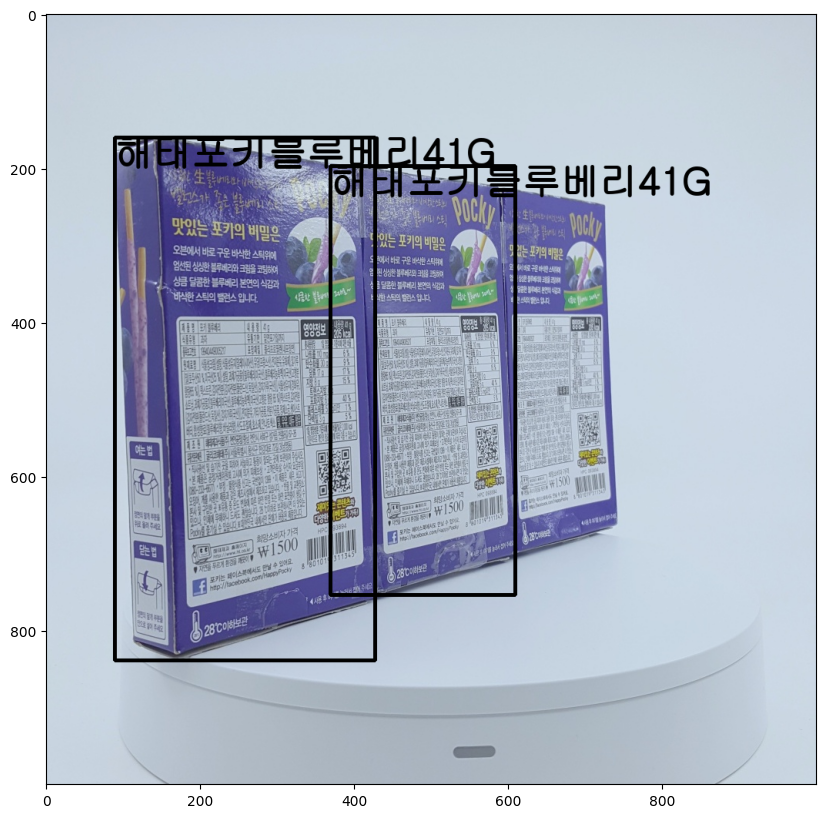

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np
from PIL import ImageFont, ImageDraw, Image


img_dir = "/content/resized/imgs"
xml_file = "/content/resized/labels/10060_0_m_10_meta.xml"


class2color = {'해태포키블루베리41G':(0, 0, 0), '크라운)콘초66G':(255, 0, 255),
               '꼬깔콘고소한맛72G':(0, 255, 255),'농심바나나킥75G':(0, 255, 255),
               '농심오징어집83G':(0, 255, 255),'농심매운새우깡90G':(0, 255, 255),
               '롯데)자일리톨베타비타D용기86G':(255, 255, 0)}

tree = ET.parse(xml_file)
root = tree.getroot()

img_path = root.find('annotation/filename').text
img_full_path = os.path.join(img_dir, img_path)
img = cv2.imread(img_full_path)
dst = img.copy()

objects = root.findall('annotation/object')
object_list = []

for obj in objects:
  box = obj.find("bndbox")
  x1 = int(box.find('xmin').text)
  y1 = int(box.find('ymin').text)
  x2 = int(box.find('xmax').text)
  y2 = int(box.find('ymax').text)

  bndbox_coor = (x1, y1, x2, y2)
  class_name = obj.find("name").text

  cv2.rectangle(dst, (x1, y1), (x2, y2), color=class2color[class_name], thickness=4)

  # Convert image to PIL Image
  pil_img = Image.fromarray(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
  draw = ImageDraw.Draw(pil_img)

  # Load a font file containing Korean characters
  font_path = "/content/drive/MyDrive/인공지능/Final Proejct/Gulim.ttf"
  font_size = 50
  font = ImageFont.truetype(font_path, font_size)

  # Draw Korean text on the image
  draw.text((x1, y1-5), class_name, font=font, fill=(0, 0, 0), stroke_width=1)

  # Convert the PIL Image back to OpenCV format
  dst = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)

  object_dict = {'class_name' : class_name, 'bndbox_coor' : bndbox_coor}
  object_list.append(object_dict)

print(object_list)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

# pipeline: 이미지 전처리

In [ ]:
pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='LoadAnnotations', with_bbox=True),
            dict(
                type='Expand', mean=[0, 0, 0], to_rgb=True,
                ratio_range=(1, 2)),
            dict(
                type='MinIoURandomCrop',
                min_ious=(0.4, 0.5, 0.6, 0.7, 0.8, 0.9),
                min_crop_size=0.3),
            dict(type='Resize', img_scale=(320, 320), keep_ratio=True),
            dict(type='RandomFlip', flip_ratio=0.5),
            dict(type='PhotoMetricDistortion'),
            dict(
                type='CutOut',
                n_holes=2,
                cutout_shape=(30, 30),
                fill_in=(0, 0, 0)),
            dict(
                type='Normalize',
                mean=[0, 0, 0],
                std=[255.0, 255.0, 255.0],
                to_rgb=True),
            dict(type='Pad', size_divisor=32),
            dict(type='DefaultFormatBundle'),
            dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels'])
        ]

[{'class_name': '해태포키블루베리41G', 'bndbox_coor': (89, 160, 427, 839)}, {'class_name': '해태포키블루베리41G', 'bndbox_coor': (369, 197, 609, 754)}]


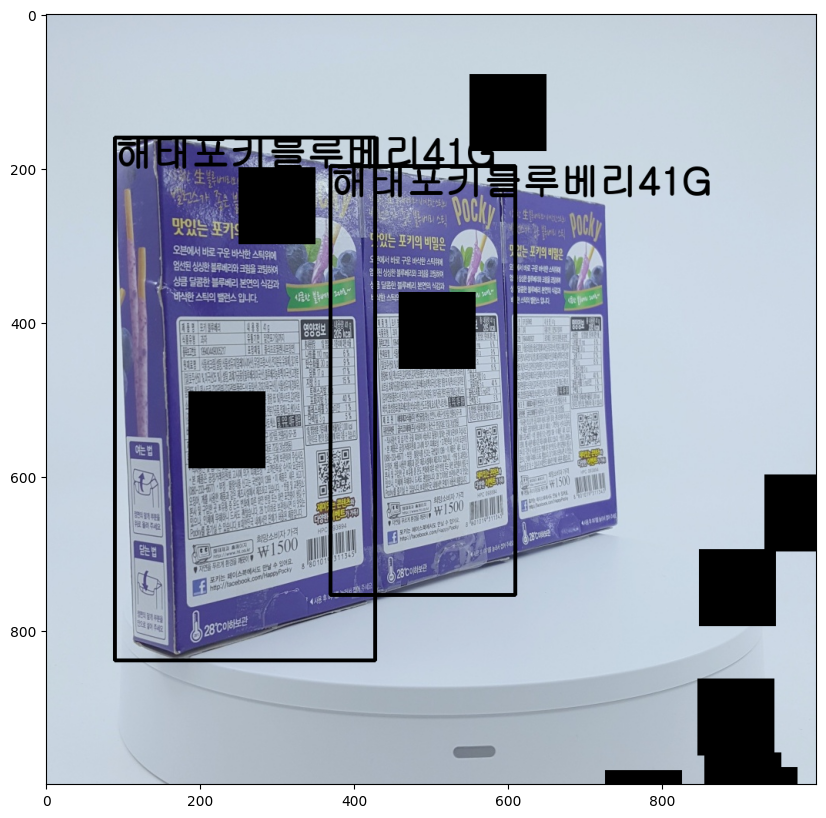

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np
from PIL import ImageFont, ImageDraw, Image
from mmdet.datasets.pipelines.transforms import CutOut


img_dir = "/content/resized/imgs"
xml_file = "/content/resized/labels/10060_0_m_10_meta.xml"


class2color = {'해태포키블루베리41G':(0, 0, 0), '크라운)콘초66G':(255, 0, 255),
               '꼬깔콘고소한맛72G':(0, 255, 255),'농심바나나킥75G':(0, 255, 255),
               '농심오징어집83G':(0, 255, 255),'농심매운새우깡90G':(0, 255, 255),
               '롯데)자일리톨베타비타D용기86G':(255, 255, 0)}

tree = ET.parse(xml_file)
root = tree.getroot()

img_path = root.find('annotation/filename').text
img_full_path = os.path.join(img_dir, img_path)
img = cv2.imread(img_full_path)
dst = img.copy()

cutout = CutOut(n_holes=10, cutout_shape=(100, 100), fill_in=(0, 0, 0))
dst = cutout({'img': dst})['img']  # Apply CutOut transformation

objects = root.findall('annotation/object')
object_list = []

for obj in objects:
    box = obj.find("bndbox")
    x1 = int(box.find('xmin').text)
    y1 = int(box.find('ymin').text)
    x2 = int(box.find('xmax').text)
    y2 = int(box.find('ymax').text)

    bndbox_coor = (x1, y1, x2, y2)
    class_name = obj.find("name").text

    cv2.rectangle(dst, (x1, y1), (x2, y2), color=class2color[class_name], thickness=4)

    # Convert image to PIL Image
    pil_img = Image.fromarray(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(pil_img)

    # Load a font file containing Korean characters
    font_path = "/content/drive/MyDrive/인공지능/Final Proejct/Gulim.ttf"
    font_size = 50
    font = ImageFont.truetype(font_path, font_size)

    # Draw Korean text on the image
    draw.text((x1, y1-5), class_name, font=font, fill=(0, 0, 0), stroke_width=1)

    # Convert the PIL Image back to OpenCV format
    dst = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)

    object_dict = {'class_name' : class_name, 'bndbox_coor' : bndbox_coor}
    object_list.append(object_dict)

print(object_list)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))